# Caso de aplicación Agrupamiento aerolinea (mercadeo)

Una aerolínea tiene la necesidad de identificar la estrategia de atención de sus clientes, identificando la posibilidad de generar esquemas diferenciados de acción dependiendo de las
determinaciones y capacidades de los clientes. Es por esto que el equipo de mercadeo decidió realizar una encuesta tratando de levantar de manera demográfica el comportamiento de los
clientes.

## Metodologia ASUM - DM

### 1. Entendimiento del negocio:
Es una aerolinea que busca entender a sus clientes en particular. El objetivo de negocio es entender las diferencias o particularidades entre clientes para ofrecer modelos diferenciados de actuación.

### 2. Enfoque analitico:
Diseñoar un experimento que permita agrupar en una cantidad especifica de grupos a los clientes de la aerolinea para definir la cantidad de acciones diferenciadas posibles.

### 3. Requerimiento de datos:
Se requieren datos demograficos, datos del servicio prestado al usuario, datos propios del negocio

### 4. Recolección de datos:
![Información sobre la recolección de datos](info_datos.png)

### 5. Entendimiento de los datos:
- Identificar la existencia de datos nulos
- Exploracion univariada de los datos
- Exploracion multivariadad de los datos
- Identificación de correlacion y multicolinealidad

## Modelo agrupamiento

### Importaciones

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')

### Data

In [2]:
data = pd.read_csv('./airline_loyalty.csv')
data

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

#### Datos nulos

**¿Que hacer?**
1. **Eliminar:**

    1.1. *Registros:* Cuando la proporcion de eliminacion total no supera el 10% de los registros.

    1.2. *Variables:* Cuando la proporcion de nulos en una variable supera el 40%

2. **Imputar:**

    2.1. *Simple:*

      - Constante: Se define un valor para completar.
      - Medidas de tendencia central: Para numericas, media o mediana. Para otros con moda.

    2.2. *Modelo:* Construye un modelo de ML de regresión para completas los datos nulos. **Mejor opción, la más compleja**

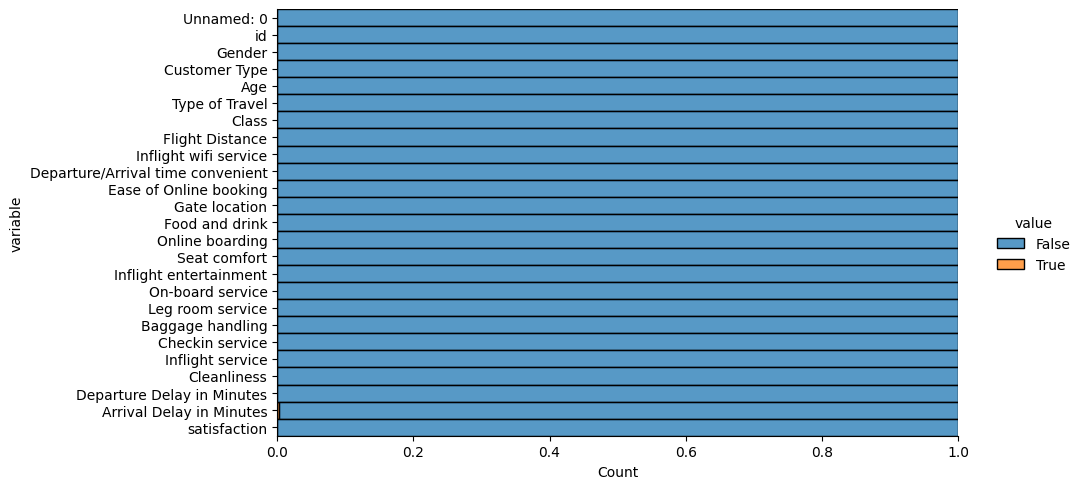

In [4]:
data.isnull().melt().pipe(lambda df: sb.displot(data = df, y = 'variable', hue = 'value', multiple = 'fill', aspect = 2))

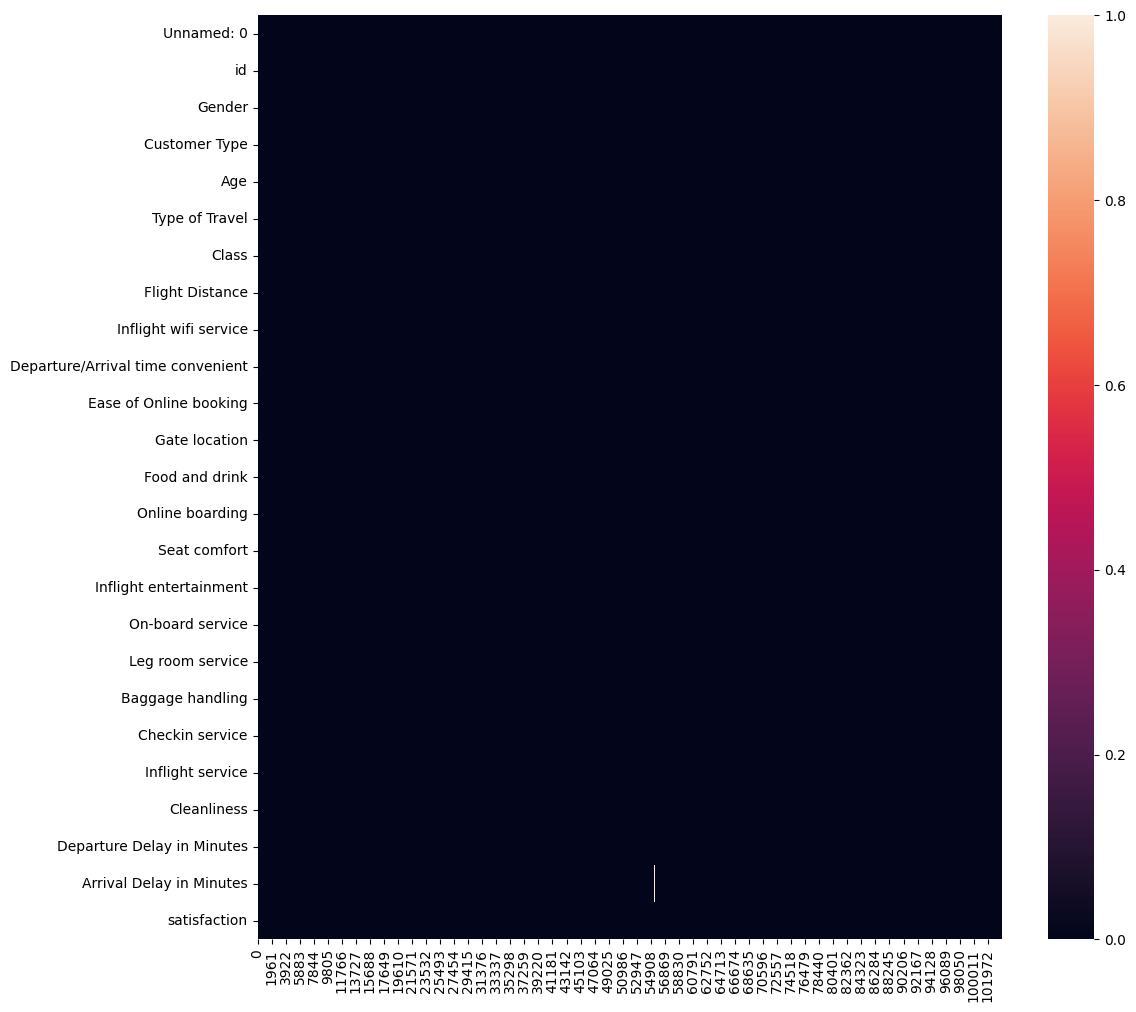

In [7]:
plt.figure(figsize=(12, 12))
data.isnull().transpose().pipe(lambda df: sb.heatmap(data = df))
plt.show()

### Exploracion univariada de los datos

- Datos numericos: Histogramas de frecuencias
  - Variables de comportamiento unico: FDP uniforme -> ignorar
  - Sesgos no naturales de la variable

- Datos categoricos: Graficos de torta.
  - Buscamos desbalances, si una categoria tiene el **80%** o mas de la proporcion de la variable hablamos de **desbalance** -> ignorar

#### Histogramas de frecuencia

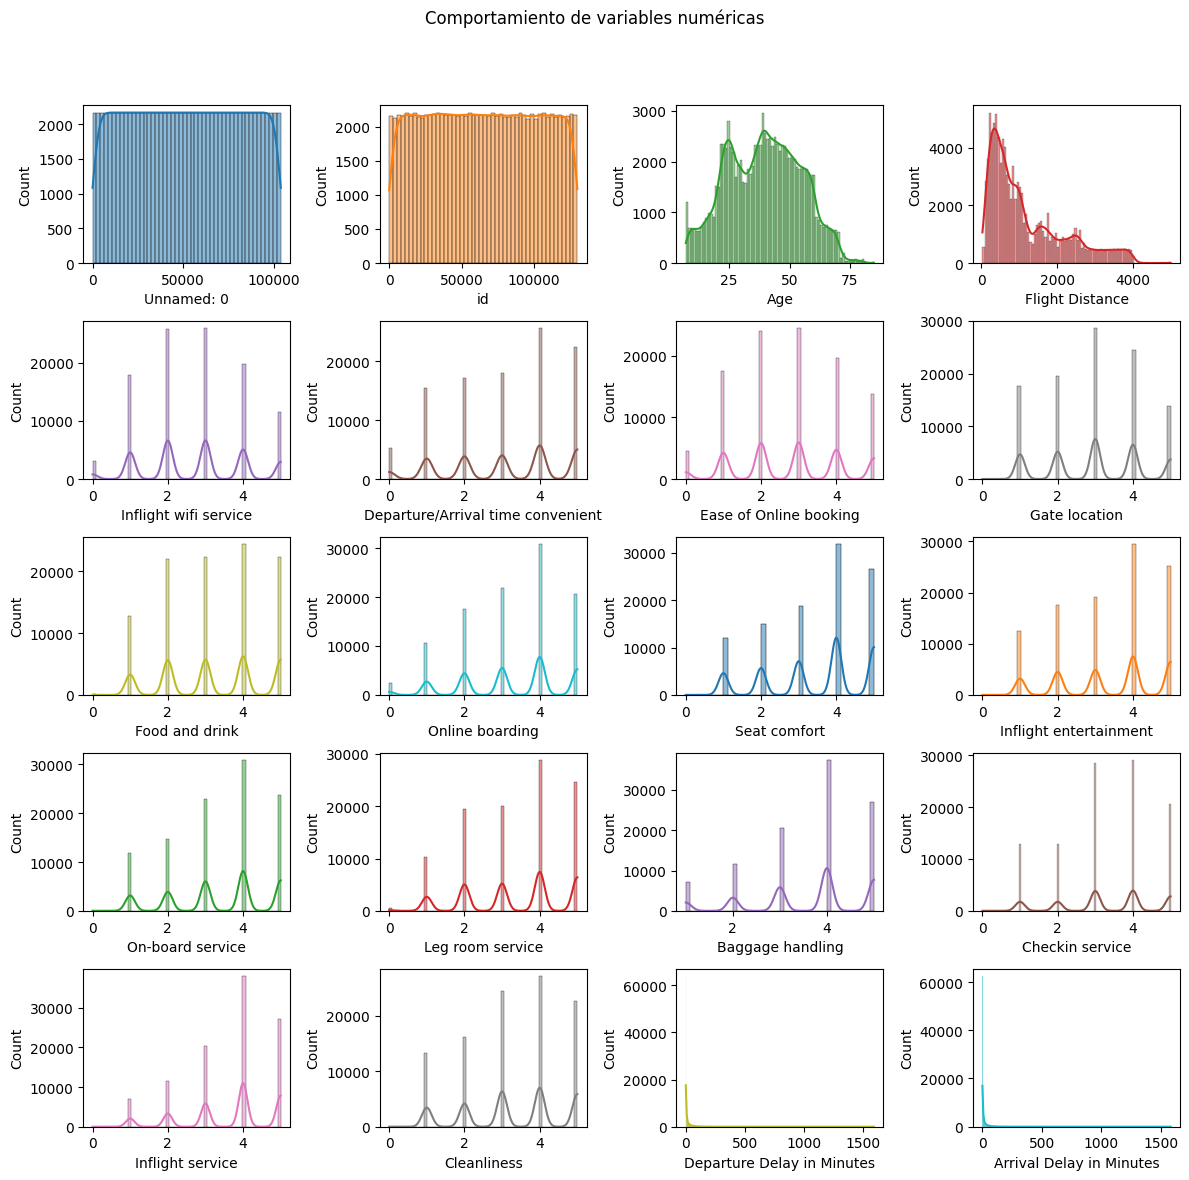

In [8]:
fig, ax = plt.subplots(5, 4, figsize=(12, 12))
ax = ax.flat

num_col = data.select_dtypes(include= ['int64', 'float64']).columns

for i, col in enumerate(num_col):
  sb.histplot(data = data, x = col, kde = True, color = (list(plt.rcParams['axes.prop_cycle']) * 7)[i]['color'], ax = ax[i])

fig.tight_layout()
fig.subplots_adjust(top=0.9)
fig.suptitle('Comportamiento de variables numéricas')
plt.show()